In [1]:
import pandas as pd

In [5]:
customers = pd.read_csv('Customer.csv')
prod_cats = pd.read_csv('prod_cat_info.csv')
transactions = pd.read_csv('Transactions.csv')

In [6]:
customers.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [7]:
prod_cats.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [8]:
transactions.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


### Exploratory Data Analysis

In [10]:
print(customers.shape)
print(prod_cats.shape)
print(transactions.shape)

(5647, 4)
(23, 4)
(23053, 10)


In [12]:
customers.dtypes

customer_Id      int64
DOB             object
Gender          object
city_code      float64
dtype: object

In [13]:
prod_cats.dtypes

prod_cat_code         int64
prod_cat             object
prod_sub_cat_code     int64
prod_subcat          object
dtype: object

In [14]:
transactions.dtypes

transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
dtype: object

In [19]:
# Changing data type of customer's DOB from object to datetime

customers['DOB'] = pd.to_datetime(customers['DOB'], format = '%d-%m-%Y')
customers.head()

,customer_Id,DOB,Gender,city_code
0,268408,1970-02-01,M,4.0
1,269696,1970-07-01,F,8.0
2,268159,1970-08-01,F,8.0
3,270181,1970-10-01,F,2.0
4,268073,1970-11-01,M,1.0


In [20]:
customers.dtypes

customer_Id             int64
DOB            datetime64[ns]
Gender                 object
city_code             float64
dtype: object

In [27]:
# Changing data type of transaction's tran_date from object to datetime

transactions['tran_date'] = transactions['tran_date'].str.replace('/', '-')
transactions['tran_date'] = pd.to_datetime(transactions['tran_date'], format = '%d-%m-%Y')
transactions.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop


In [28]:
transactions.dtypes

transaction_id               int64
cust_id                      int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
dtype: object

### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [56]:
cust_tran = pd.merge(left = transactions, right = customers, left_on = 'cust_id', right_on = 'customer_Id', how = 'left')

In [57]:
Customer_Final = pd.merge(left = cust_tran, right = prod_cats, left_on = ['prod_subcat_code', 'prod_cat_code'], right_on = ['prod_sub_cat_code', 'prod_cat_code'], how = 'left')

In [59]:
Customer_Final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,1,Women
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,1973-11-05,F,8.0,Electronics,5,Computers
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,1992-07-27,M,8.0,Books,6,DIY
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,271509,1981-08-06,M,3.0,Home and kitchen,11,Bath
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,1992-07-27,M,8.0,Books,6,DIY


In [60]:
Customer_Final.duplicated().sum()

13

In [61]:
Customer_Final.drop_duplicates(inplace = True)

In [62]:
Customer_Final.duplicated().sum()

0

### 2. Prepare a summary report for the merged data set.

### (a) Get the column names and their corresponding data types

In [63]:
Customer_Final.dtypes

transaction_id                int64
cust_id                       int64
tran_date            datetime64[ns]
prod_subcat_code              int64
prod_cat_code                 int64
Qty                           int64
Rate                          int64
Tax                         float64
total_amt                   float64
Store_type                   object
customer_Id                   int64
DOB                  datetime64[ns]
Gender                       object
city_code                   float64
prod_cat                     object
prod_sub_cat_code             int64
prod_subcat                  object
dtype: object

### (b) Top/Bottom 10 observations

In [64]:
# Top 10 Observations

Customer_Final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,1,Women
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,1973-11-05,F,8.0,Electronics,5,Computers
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,1992-07-27,M,8.0,Books,6,DIY
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,271509,1981-08-06,M,3.0,Home and kitchen,11,Bath
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,1992-07-27,M,8.0,Books,6,DIY
5,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,272357,1982-09-10,F,6.0,Electronics,8,Personal Appliances
6,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,273667,1981-05-29,M,9.0,Home and kitchen,11,Bath
7,22643667930,271489,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop,271489,1971-04-21,M,9.0,Home and kitchen,12,Tools
8,79792372943,275108,2014-02-22,3,1,-3,-908,286.020,-3010.020,MBR,275108,1971-04-11,F,8.0,Clothing,3,Kids
9,50076728598,269014,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,269014,1979-11-27,F,3.0,Electronics,8,Personal Appliances


In [65]:
# Bottom 10 observations

Customer_Final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
23043,49882891062,271982,2011-01-25,10,5,4,1330,558.600,5878.600,e-Shop,271982,1976-10-08,M,8.0,Books,10,Non-Fiction
23044,14787475597,273982,2011-01-25,4,3,5,969,508.725,5353.725,e-Shop,273982,1991-12-10,M,4.0,Electronics,4,Mobiles
23045,50691119572,273031,2011-01-25,6,5,1,1148,120.540,1268.540,TeleShop,273031,1980-01-17,F,8.0,Books,6,DIY
23046,40893803228,272049,2011-01-25,11,6,3,1077,339.255,3570.255,e-Shop,272049,1975-06-28,F,6.0,Home and kitchen,11,Bath
23047,30856003613,266866,2011-01-25,4,2,2,444,93.240,981.240,TeleShop,266866,1974-04-18,M,4.0,Footwear,4,Kids
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,274550,1972-02-21,M,7.0,Books,12,Academic
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,270022,1984-04-27,M,9.0,Clothing,4,Mens
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,271020,1976-06-20,M,8.0,Home and kitchen,2,Furnishing
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,270911,1970-05-22,M,2.0,Books,11,Children
23052,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,271961,1982-01-15,M,1.0,Books,11,Children


### (c) “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [83]:
Customer_Final[['Qty', 'Rate', 'Tax', 'total_amt']].describe().loc[['min', '25%', '50%', '75%', 'max']]

,Qty,Rate,Tax,total_amt
min,-5.0,-1499.0,7.3500,-8270.925
25%,1.0,312.0,98.2800,762.450
50%,3.0,710.0,199.0800,1756.950
75%,4.0,1109.0,365.7675,3570.255
max,5.0,1500.0,787.5000,8287.500


### (d) Frequency tables for all the categorical variables

In [85]:
pd.crosstab(index = Customer_Final['prod_subcat_code'], columns = 'frequency')

col_0,frequency
prod_subcat_code,
1,2948
2,1007
3,3065
4,4000
5,958
6,989
7,1043
8,970
9,985


In [86]:
pd.crosstab(index = Customer_Final['prod_cat_code'], columns = 'frequency')

col_0,frequency
prod_cat_code,
1,2960
2,2996
3,4895
4,1997
5,6066
6,4126


In [87]:
pd.crosstab(index = Customer_Final['Store_type'], columns = 'frequency')

col_0,frequency
Store_type,
Flagship store,4575
MBR,4660
TeleShop,4501
e-Shop,9304


In [88]:
pd.crosstab(index = Customer_Final['Gender'], columns = 'frequency')

col_0,frequency
Gender,
F,11227
M,11804


In [89]:
pd.crosstab(index = Customer_Final['city_code'], columns = 'frequency')

col_0,frequency
city_code,
1.0,2255
2.0,2268
3.0,2410
4.0,2422
5.0,2357
6.0,2127
7.0,2356
8.0,2328
9.0,2176


In [90]:
pd.crosstab(index = Customer_Final['prod_cat'], columns = 'frequency')

col_0,frequency
prod_cat,
Bags,1997
Books,6066
Clothing,2960
Electronics,4895
Footwear,2996
Home and kitchen,4126


In [91]:
pd.crosstab(index = Customer_Final['prod_subcat'], columns = 'frequency')

col_0,frequency
prod_subcat,
Academic,966
Audio and video,952
Bath,1022
Cameras,985
Children,1035
Comics,1030
Computers,958
DIY,989
Fiction,1043


In [84]:
Customer_Final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,1,Women
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,1973-11-05,F,8.0,Electronics,5,Computers
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,1992-07-27,M,8.0,Books,6,DIY
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,271509,1981-08-06,M,3.0,Home and kitchen,11,Bath
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,1992-07-27,M,8.0,Books,6,DIY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,274550,1972-02-21,M,7.0,Books,12,Academic
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,270022,1984-04-27,M,9.0,Clothing,4,Mens
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,271020,1976-06-20,M,8.0,Home and kitchen,2,Furnishing
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,270911,1970-05-22,M,2.0,Books,11,Children


### 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

array([[<AxesSubplot:title={'center':'Qty'}>,
        <AxesSubplot:title={'center':'Rate'}>],
       [<AxesSubplot:title={'center':'Tax'}>,
        <AxesSubplot:title={'center':'total_amt'}>]], dtype=object)

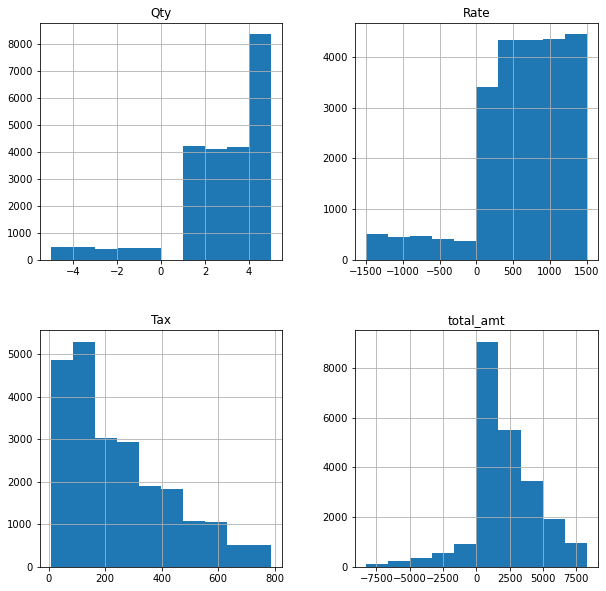

In [95]:
# Histograms for all continuous variables.

Customer_Final[['Qty', 'Rate', 'Tax', 'total_amt']].hist(figsize = (10,10))